In [1]:
# Import standard modules

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import time

# Set paths & import pymsg

MSG_DIR = os.environ['MSG_DIR']

sys.path.insert(0, os.path.join(MSG_DIR, 'python'))
import pymsg

# Set plot parameters

%matplotlib inline
plt.rcParams.update({'font.size': 16})

# Load the SpecGrid

specgrid = pymsg.SpecGrid('sg-CAP18-coarse.h5')

In [2]:
# Inspect the cache

print(f'cache usage: {specgrid.cache_usage} MB')
print(f'cache limit: {specgrid.cache_limit} MB')

cache usage: 0 MB
cache limit: 128 MB


In [3]:
# Random flux routine

def random_flux():
    
    start_time = time.process_time()
    
    # Set up the wavelength abscissa (visible-spectrum)
    
    lam_min = 3000.
    lam_max = 7000.

    lam = np.linspace(lam_min, lam_max, 1000)
    
    # Loop until a valid set of atmospheric parameters is found
    
    while True:
        
        # Choose random atmospheric parameters
    
        x = {}
    
        for label in specgrid.axis_labels:
            x[label] = rn.uniform(specgrid.axis_x_min[label], specgrid.axis_x_max[label])
            
        # Interpolate the flux, allowing for the fact that the 
        # atmospheric parameters may fall in a grid void

        try:
            flux = specgrid.flux(x, lam)
            break
        except LookupError:
            pass
        
    end_time = time.process_time()
    
    return end_time-start_time

In [4]:
# Run random_flux three times

for i in range(3):
    random_flux()
    print(f'cache usage: {specgrid.cache_usage} MB')

cache usage: 86 MB
cache usage: 128 MB
cache usage: 128 MB


In [5]:
# Increase the cache limit to 256 MB

specgrid.cache_limit = 256

# Run random_flux three times

for i in range(3):
    random_flux()
    print(f'cache usage: {specgrid.cache_usage} MB')

cache usage: 244 MB
cache usage: 256 MB
cache usage: 256 MB


In [6]:
# Flush the cache

print(f'cache usage: {specgrid.cache_usage} MB')

specgrid.flush_cache()

print(f'cache usage: {specgrid.cache_usage} MB')

cache usage: 256 MB
cache usage: 0 MB


In [7]:
# Subset to the visible part of the spectrum

specgrid.cache_lam_min = 3000.
specgrid.cache_lam_max = 7000.

# Run random_flux three times

for i in range(3):
    random_flux()
    print(f'cache usage: {specgrid.cache_usage} MB')

cache usage: 9 MB
cache usage: 28 MB
cache usage: 47 MB


In [8]:
# Flush the cache and set the limit to 512 MB

specgrid.flush_cache()
specgrid.cache_limit = 512

# Allocate usage & timing arrays

n = 300

cache_usages_512 = np.empty(n, dtype=int)
exec_timings_512 = np.empty(n)

# Call random_flux

for i in range(n):
    exec_timings_512[i] = random_flux()
    cache_usages_512[i] = specgrid.cache_usage

Text(0, 0.5, 'exution time (s)')

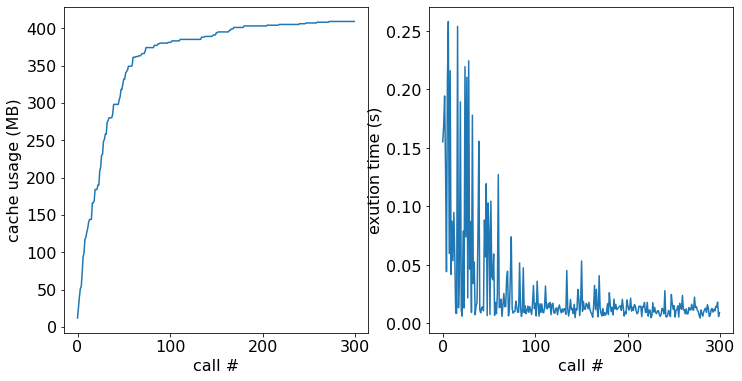

In [9]:
# Plot cache usage and execution time

fig, ax = plt.subplots(ncols=2, figsize=[12,6])

ax[0].plot(cache_usages_512)
ax[0].set_xlabel('call #')
ax[0].set_ylabel('cache usage (MB)')

ax[1].plot(exec_timings_512)
ax[1].set_xlabel('call #')
ax[1].set_ylabel('exution time (s)')

Text(0, 0.5, 'exution time (s)')

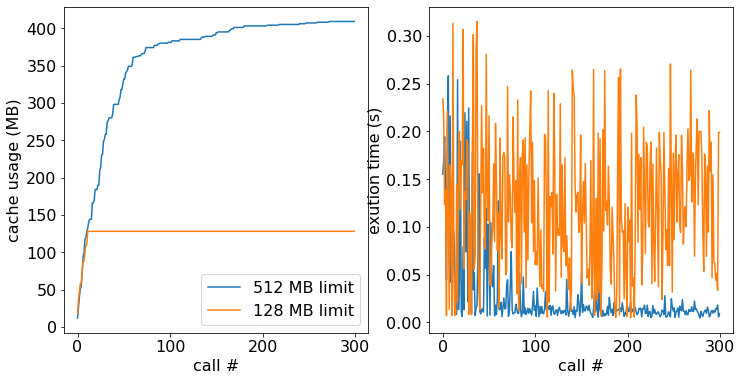

In [10]:
# Flush the cache and set the limit to 128 MB

specgrid.flush_cache()
specgrid.cache_limit = 128

# Allocate usage & timing arrays

n = 300

cache_usages_128 = np.empty(n, dtype=int)
exec_timings_128 = np.empty(n)

# Call random_flux

for i in range(n):
    exec_timings_128[i] = random_flux()
    cache_usages_128[i] = specgrid.cache_usage
    
# Plot cache usage and execution time

fig, ax = plt.subplots(ncols=2, figsize=[12,6])

ax[0].plot(cache_usages_512, label='512 MB limit')
ax[0].plot(cache_usages_128, label='128 MB limit')
ax[0].set_xlabel('call #')
ax[0].set_ylabel('cache usage (MB)')
ax[0].legend(loc=4)

ax[1].plot(exec_timings_512)
ax[1].plot(exec_timings_128)
ax[1].set_xlabel('call #')
ax[1].set_ylabel('exution time (s)')